In [72]:
# Import libraries needed
import functions as ft
import matplotlib.pyplot as plt
import numpy as np

# Dry calibration 

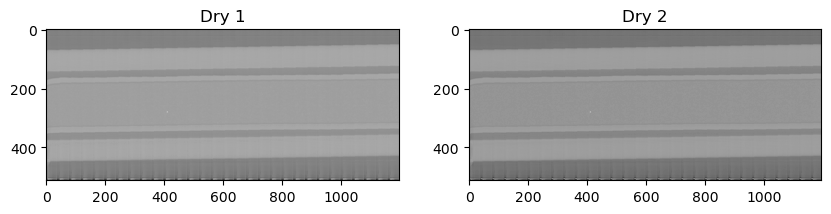

In [2]:
# Compare dry to dry sample
dry_1 = 'C:/Users/ubillusj/Desktop/Almostafa/CO2/Dry_1/'
dry_2 = 'C:/Users/ubillusj/Desktop/Almostafa/CO2/Dry_2/'

# Read dicom files
dry_1_slices = ft.read_dicom(dry_1)
dry_2_slices = ft.read_dicom(dry_2)

fig,ax = plt.subplots(1,2,figsize=(10,10))

ax[0].imshow(dry_1_slices[256],cmap='gray')
ax[0].set_title('Dry 1')
ax[1].imshow(dry_2_slices[256],cmap='gray')
ax[1].set_title('Dry 2')

plt.show()

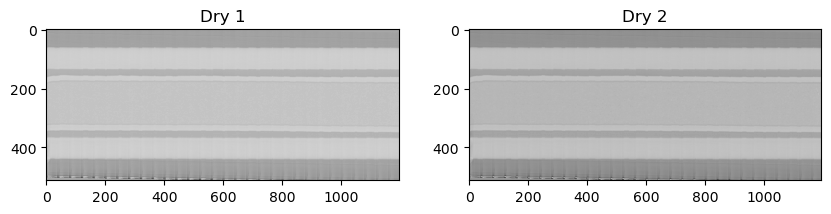

In [3]:
# center images 
center_1, dry_1_aligned = ft.center_itk(dry_1_slices,265,259,244,261)
center_2, dry_2_aligned = ft.center_itk(dry_2_slices,265,259,244,261)

fig,ax = plt.subplots(1,2,figsize=(10,10))

ax[0].imshow(dry_1_aligned[256],cmap='gray')
ax[0].set_title('Dry 1')
ax[1].imshow(dry_2_aligned[256],cmap='gray')
ax[1].set_title('Dry 2')

plt.show()

(120, 120, 1196) (120, 120, 1196)


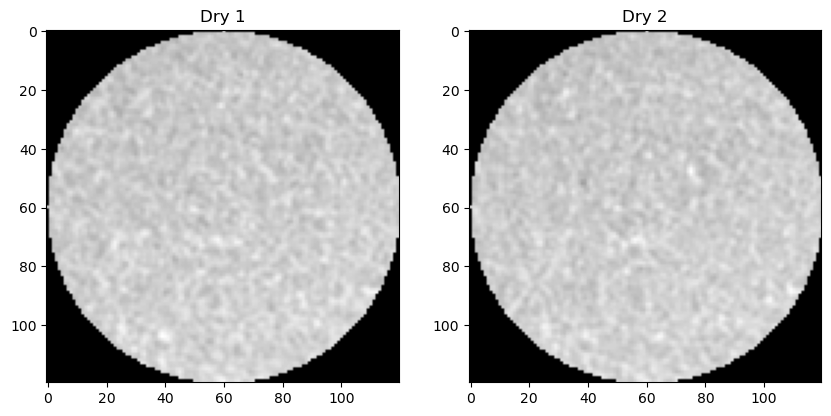

In [5]:
# crop dry images
dry_1_masked = ft.mask_images(dry_1_aligned,256,256,67,1196)
dry_2_masked = ft.mask_images(dry_2_aligned,256,256,67,1196)

print(dry_1_masked.shape,dry_2_masked.shape)

fig,ax = plt.subplots(1,2,figsize=(10,10))

ax[0].imshow(dry_1_masked[:,:,256],cmap='gray')
ax[0].set_title('Dry 1')
ax[1].imshow(dry_2_masked[:,:,256],cmap='gray')
ax[1].set_title('Dry 2')

plt.show()

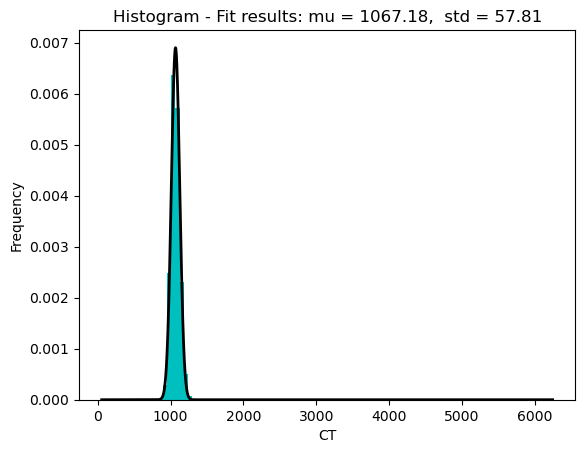

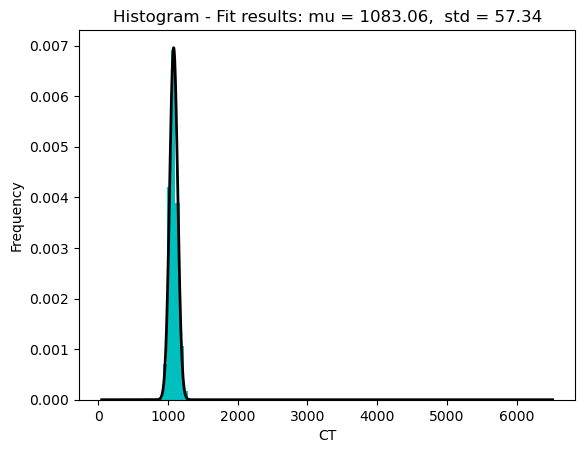

In [7]:
# Histograms for different slices
ft.histograms(dry_1_masked)
ft.histograms(dry_2_masked)

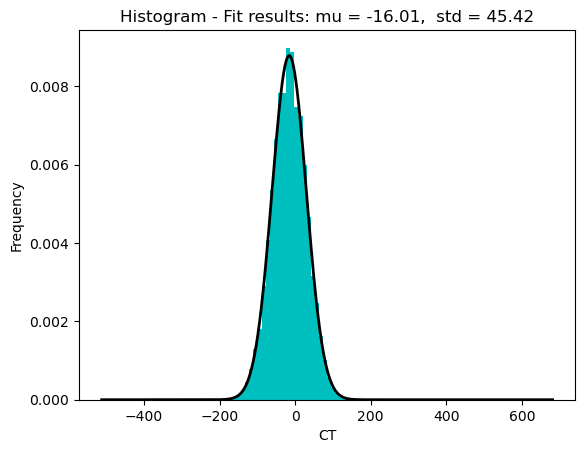

In [8]:
# Difference between dry samples
dry_diff = dry_1_masked - dry_2_masked

# plot histogram
ft.histograms(dry_diff)

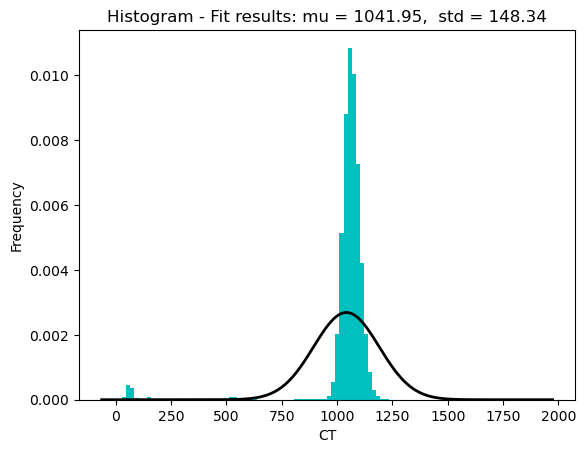

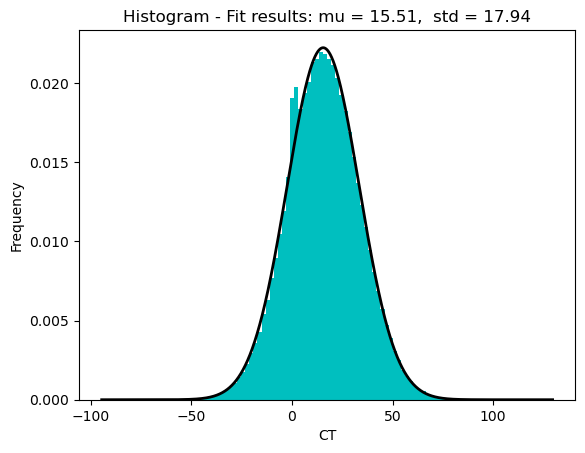

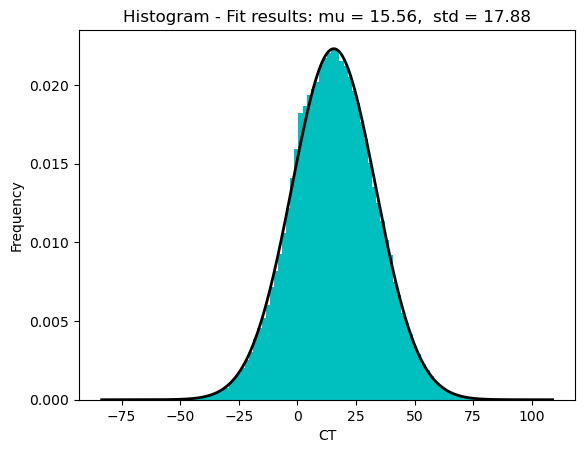

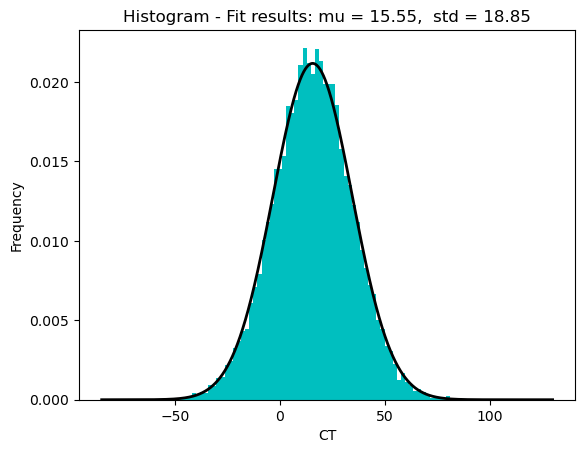

In [70]:
# Resample both dry scans
dry1r075 = ft.resample(dry_1_masked,size=3,new_spacing=[0.75,0.75,0.75])
dry1r1 = ft.resample(dry_1_masked,size=3,new_spacing=[1,1,1])
dry1r2 = ft.resample(dry_1_masked,size=3,new_spacing=[2,2,2])

dry2r075 = ft.resample(dry_2_masked,size=3,new_spacing=[0.75,0.75,0.75])
dry2r1 = ft.resample(dry_2_masked,size=3,new_spacing=[1,1,1])
dry2r2 = ft.resample(dry_2_masked,size=3,new_spacing=[2,2,2])

diffr075 = dry2r075 - dry1r075
diffr1 = dry2r1 - dry1r1
diffr2 = dry2r2 - dry1r2

# plot histograms
ft.histograms(dry1r075)
ft.histograms(diffr075)
ft.histograms(diffr1)
ft.histograms(diffr2)



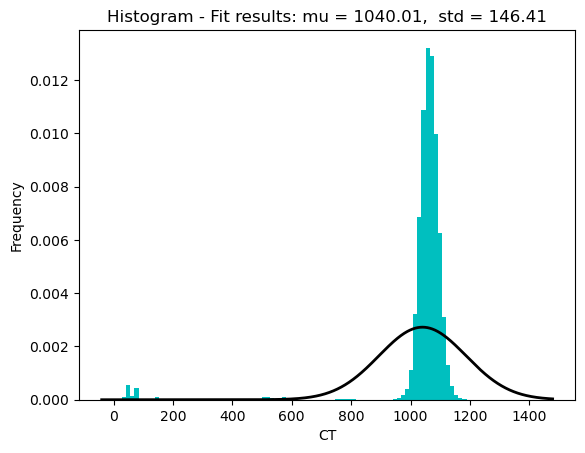

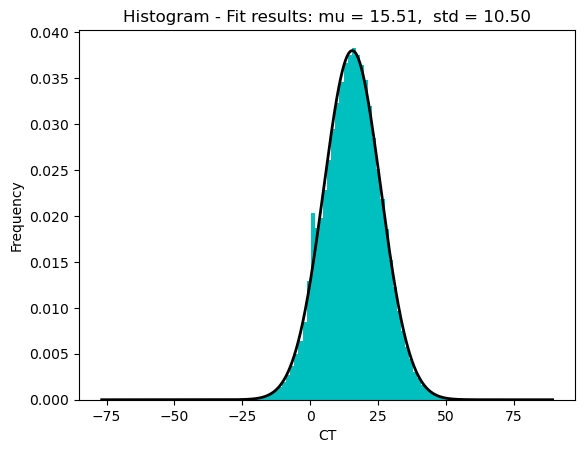

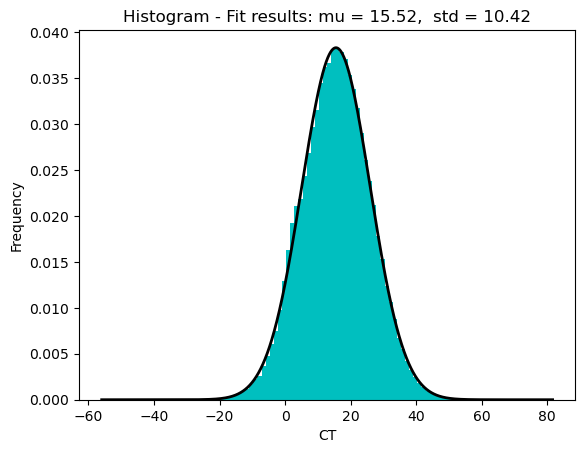

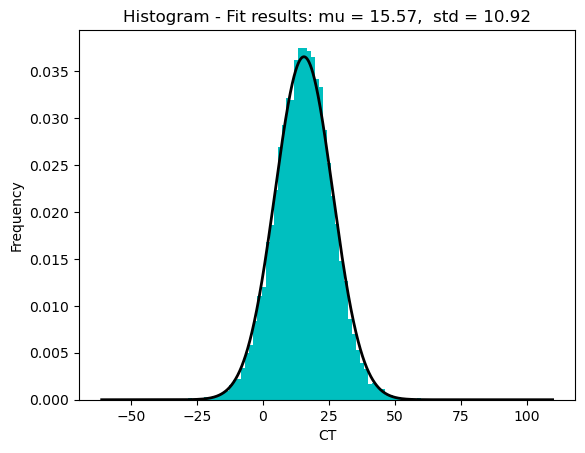

In [68]:
# Resample both dry scans
dry1r075 = ft.resample(dry_1_masked,size=5,new_spacing=[0.75,0.75,0.75])
dry1r1 = ft.resample(dry_1_masked,size=5,new_spacing=[1,1,1])
dry1r2 = ft.resample(dry_1_masked,size=5,new_spacing=[2,2,2])

dry2r075 = ft.resample(dry_2_masked,size=5,new_spacing=[0.75,0.75,0.75])
dry2r1 = ft.resample(dry_2_masked,size=5,new_spacing=[1,1,1])
dry2r2 = ft.resample(dry_2_masked,size=5,new_spacing=[2,2,2])

diffr075 = dry2r075 - dry1r075
diffr1 = dry2r1 - dry1r1
diffr2 = dry2r2 - dry1r2

# plot histograms
ft.histograms(dry1r075)
ft.histograms(diffr075)
ft.histograms(diffr1)
ft.histograms(diffr2)

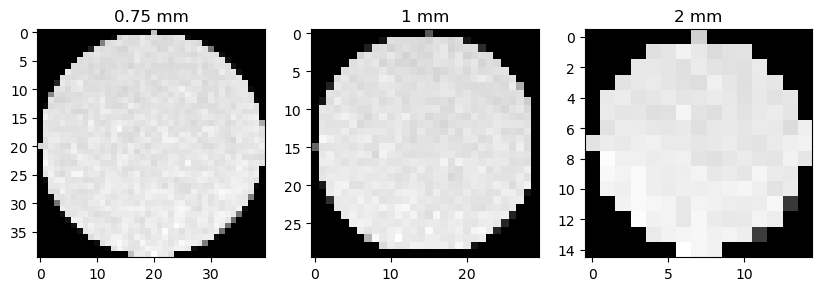

In [71]:
fig,ax = plt.subplots(1,3,figsize=(10,10))

ax[0].imshow(dry1r075[:,:,10],cmap='gray')
ax[0].set_title('0.75 mm')
ax[1].imshow(dry1r1[:,:,10],cmap='gray')
ax[1].set_title('1 mm')
ax[2].imshow(dry1r2[:,:,10],cmap='gray')
ax[2].set_title('2 mm')

plt.show()



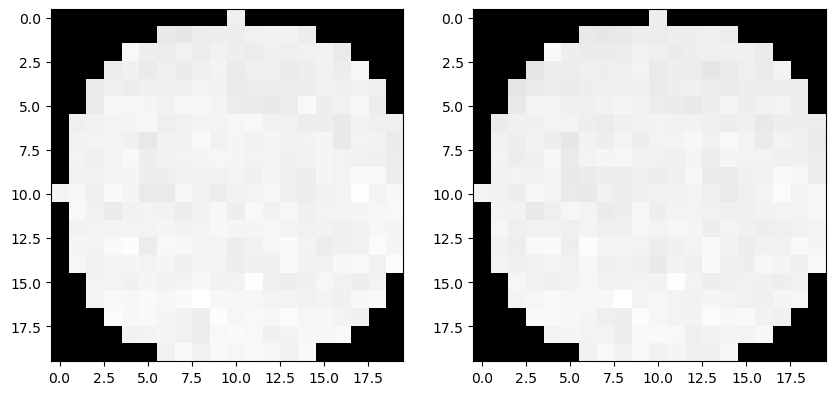

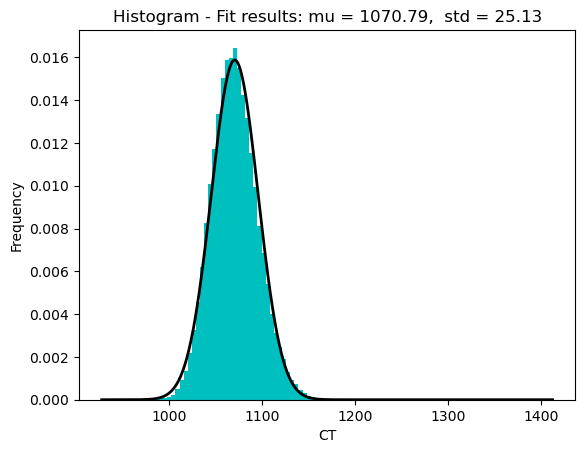

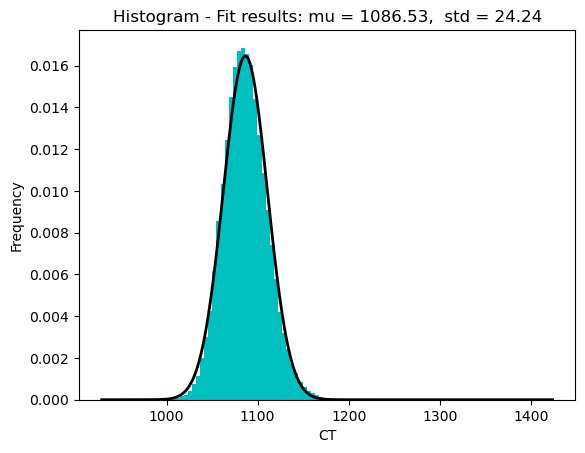

In [46]:
# Mask again to get rid off the edges
d1 = ft.mask_images(dry1r1,17,17,10,1196)
d2 = ft.mask_images(dry2r1,17,17,10,1196)
fig,[ax1,ax2] = plt.subplots(1,2,figsize=(10,10))
ax1.imshow(d1[:,:,256],cmap='gray')
ax2.imshow(d2[:,:,256],cmap='gray')
plt.show()
ft.histograms(d1)
ft.histograms(d2)

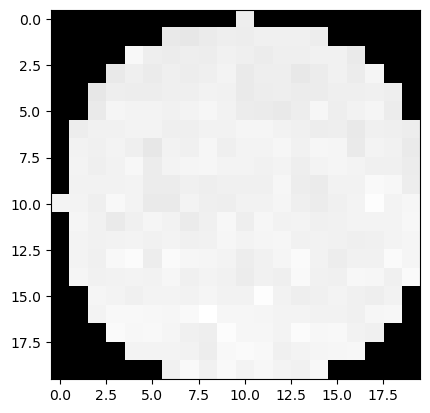

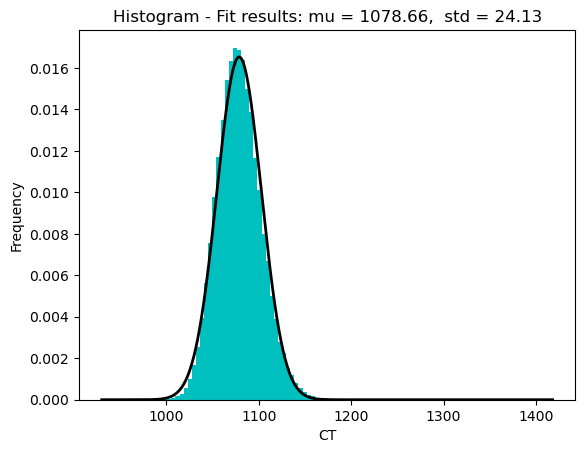

In [47]:
# Average both dry scans
dry_avg = (d1 + d2)/2
plt.imshow(dry_avg[:,:,256],cmap='gray')
plt.show()
ft.histograms(dry_avg)

# Brine calibration

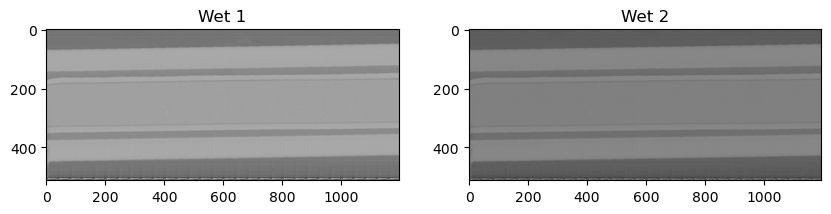

In [30]:
# Compare dry to dry sample
wet_1 = 'C:/Users/ubillusj/Desktop/Almostafa/CO2/Br_1/'
wet_2 = 'C:/Users/ubillusj/Desktop/Almostafa/CO2/Br_2/'

# Read dicom files
wet_1_slices = ft.read_dicom(wet_1)
wet_2_slices = ft.read_dicom(wet_2)

fig,ax = plt.subplots(1,2,figsize=(10,10))

ax[0].imshow(wet_1_slices[256],cmap='gray')
ax[0].set_title('Wet 1')
ax[1].imshow(wet_2_slices[256],cmap='gray')
ax[1].set_title('Wet 2')

plt.show()

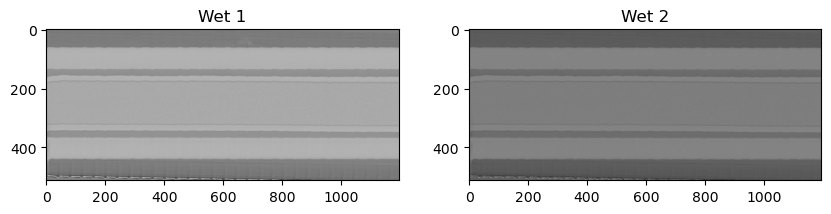

In [31]:
# center images 
center_1, wet_1_aligned = ft.center_itk(wet_1_slices,265,259,243,255)
center_2, wet_2_aligned = ft.center_itk(wet_2_slices,265,259,243,255)

fig,ax = plt.subplots(1,2,figsize=(10,10))

ax[0].imshow(wet_1_aligned[256],cmap='gray')
ax[0].set_title('Wet 1')
ax[1].imshow(wet_2_aligned[256],cmap='gray')
ax[1].set_title('Wet 2')

plt.show()

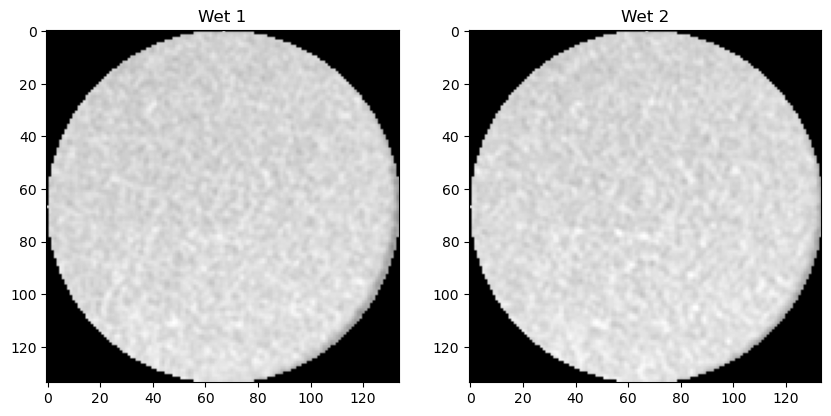

In [32]:
# crop dry images
wet_1_masked = ft.mask_images(wet_1_aligned,256,256,67,1196)
wet_2_masked = ft.mask_images(wet_2_aligned,256,256,67,1196)

fig,ax = plt.subplots(1,2,figsize=(10,10))

ax[0].imshow(wet_1_masked[:,:,256],cmap='gray')
ax[0].set_title('Wet 1')
ax[1].imshow(wet_2_masked[:,:,256],cmap='gray')
ax[1].set_title('Wet 2')

plt.show()

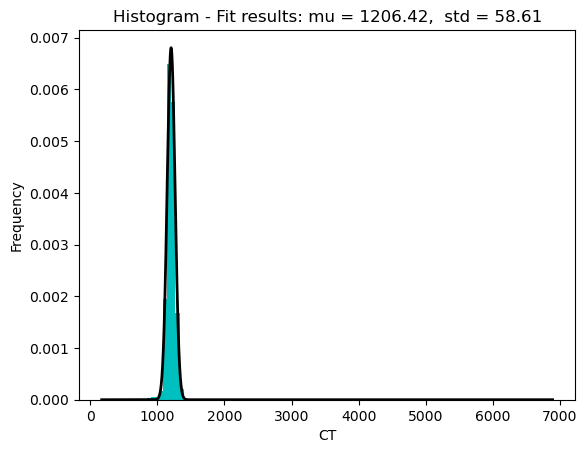

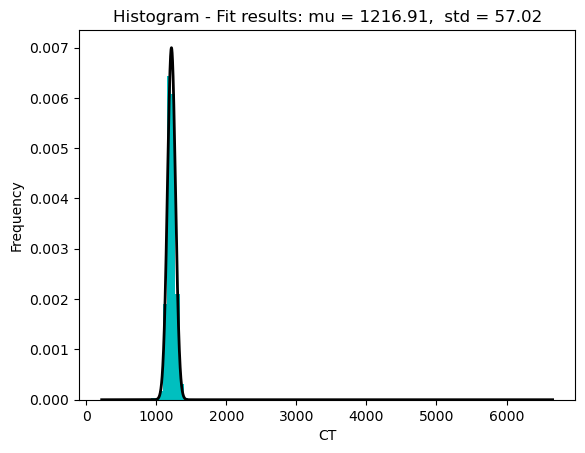

In [65]:
ft.histograms(wet_1_masked)
ft.histograms(wet_2_masked)

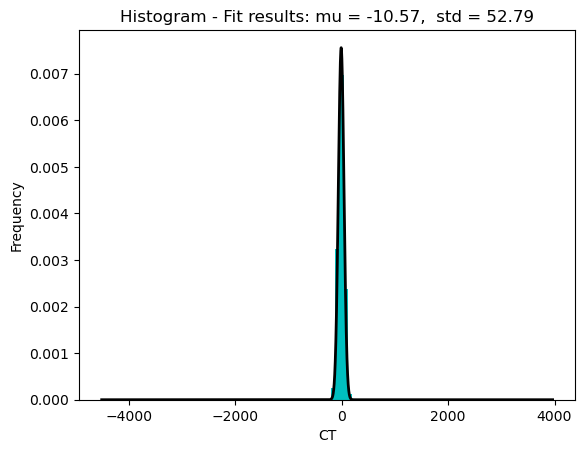

In [33]:
ft.histograms(wet_1_masked-wet_2_masked)

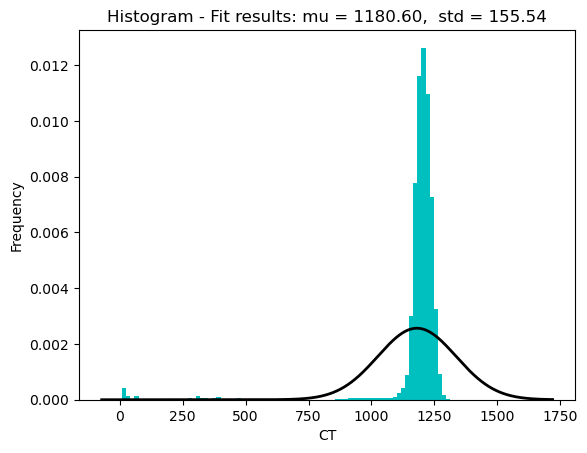

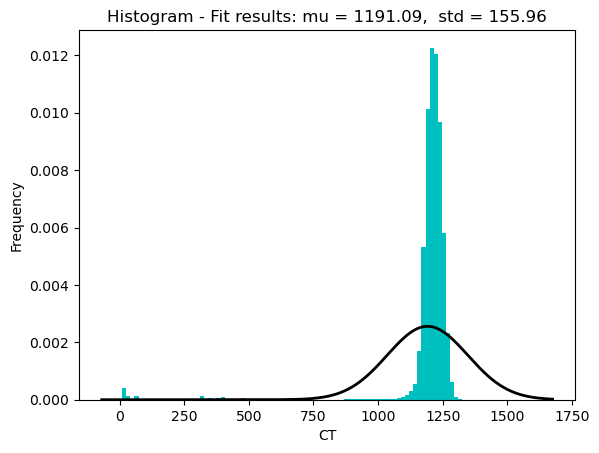

In [48]:
# Resample both wet scans
wet1r1 = ft.resample(wet_1_masked,size=5,new_spacing=[1,1,1])
wet2r1 = ft.resample(wet_2_masked,size=5,new_spacing=[1,1,1])

# plot histograms  
ft.histograms(wet1r1)
ft.histograms(wet2r1)


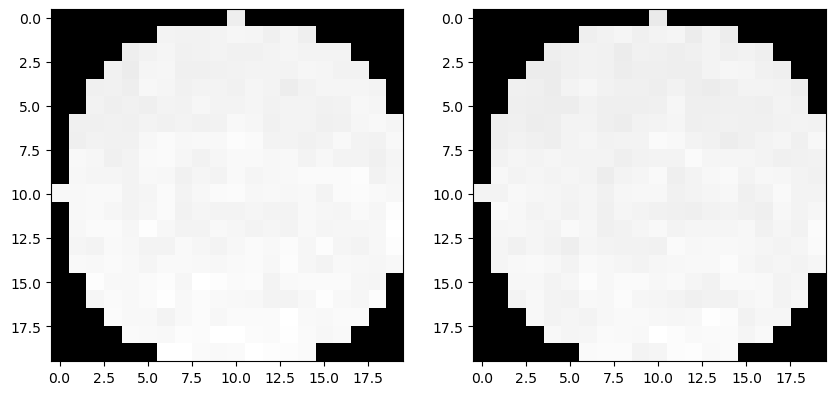

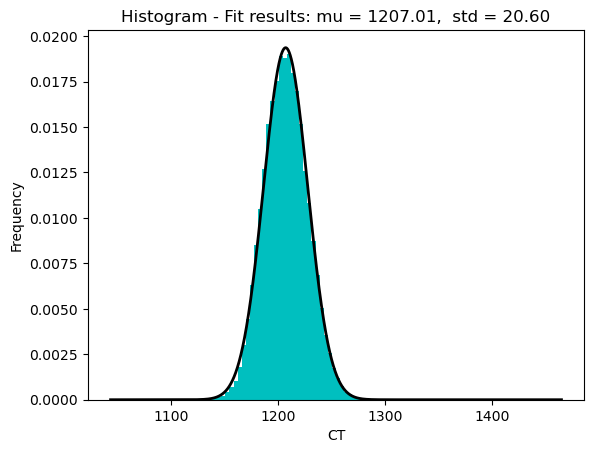

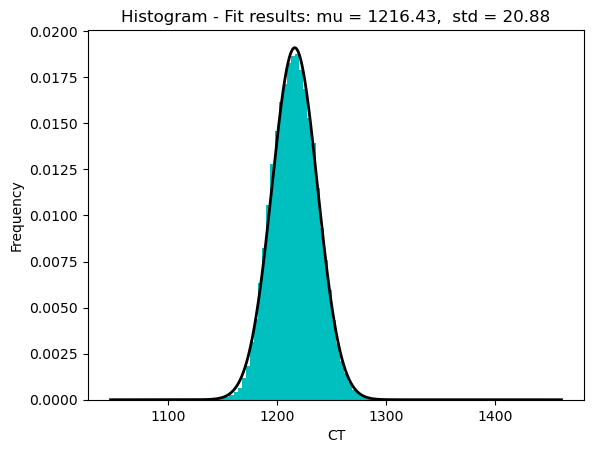

In [51]:
# Mask again to get rid off the edges
w1 = ft.mask_images(wet1r1,17,17,10,1196)
w2 = ft.mask_images(wet2r1,17,17,10,1196)

fig,ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(w1[:,:,256],cmap='gray')
ax[1].imshow(w2[:,:,256],cmap='gray')

plt.show()

ft.histograms(w1)
ft.histograms(w2)


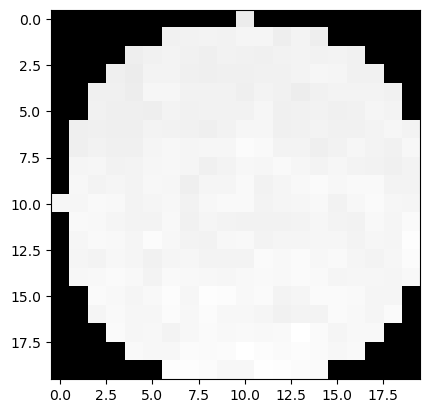

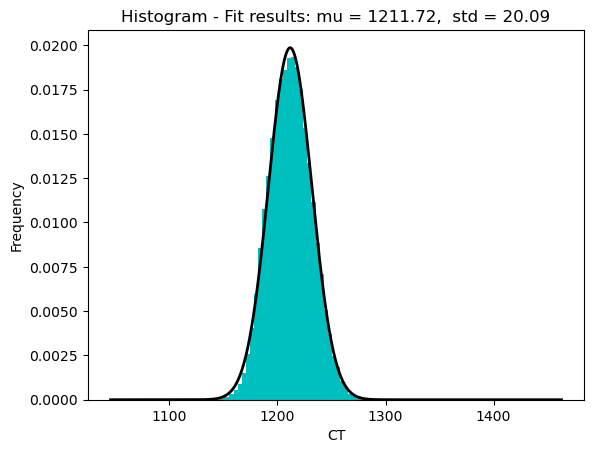

In [52]:
# Avg both wet scans
wet_avg = (w1 + w2)/2
plt.imshow(wet_avg[:,:,256],cmap='gray')

plt.show()

ft.histograms(wet_avg)

## Porosity estimation

### Core level porosity 

In [77]:
wet_temp = wet_avg.copy()
wet_temp[wet_temp == 0] = np.nan

dry_temp = dry_avg.copy()
dry_temp[dry_temp == 0] = np.nan

ct_dry_avg = np.nanmean(dry_temp)
ct_wet_avg = np.nanmean(wet_temp)

por_core = (ct_wet_avg - ct_dry_avg)/(0-(-1000))

print(ct_dry_avg)
print(ct_wet_avg)
print('Porosity of core sample is: ',round(por_core,3))

1078.6578
1211.722
Porosity of core sample is:  0.133


### Slice averaged porosity


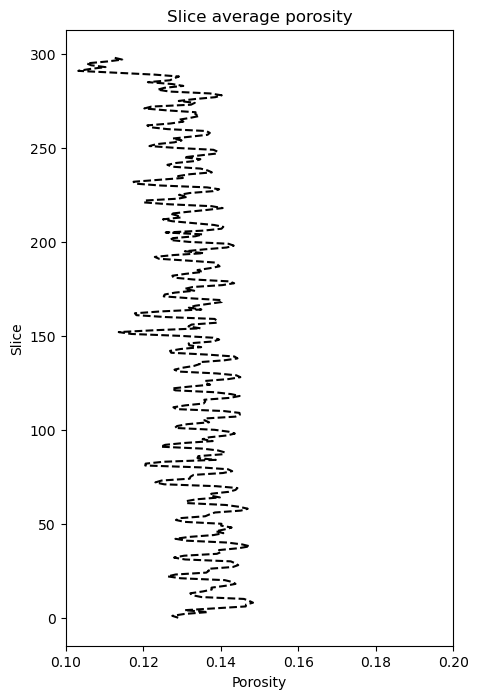

In [92]:
slice_dry_avg_ct = np.nanmean(dry_temp,axis=(0,1))
slice_wet_avg_ct = np.nanmean(wet_temp,axis=(0,1))

poro_slice = (slice_wet_avg_ct - slice_dry_avg_ct)/(0-(-1000))

plt.figure(figsize=(5,8))
plt.plot(poro_slice,range(len(poro_slice)),color='black',linestyle='--')
plt.title('Slice average porosity')
plt.xlim(0.1,0.2)
plt.ylabel('Slice')
plt.xlabel('Porosity')

plt.show()

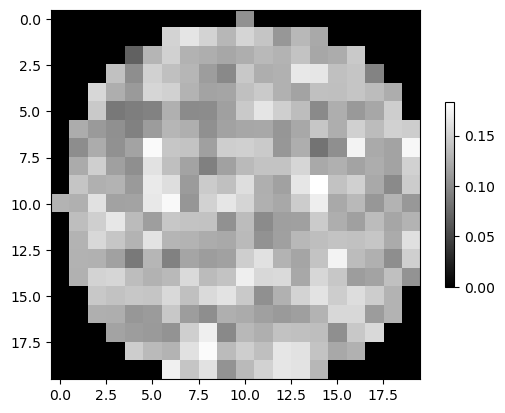

In [54]:
# From Ni et al and Pini et aL

poro = (wet_avg - dry_avg)/(0-(-1000))
plt.imshow(poro[:,:,256],cmap='gray')
plt.colorbar(orientation='vertical',shrink = 0.5)
plt.show()

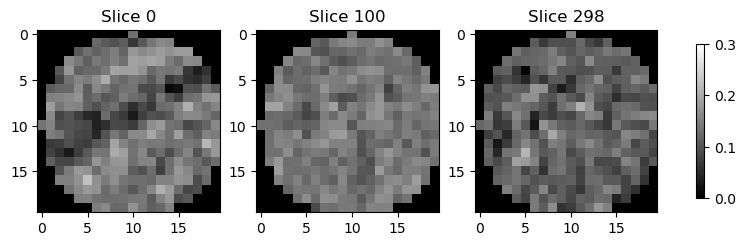

In [64]:
fig, axs = plt.subplots(1,3,figsize=(10,10))
im = axs[0].imshow(poro[:,:,0],cmap='gray',vmin=0,vmax=0.3)
axs[0].set_title('Slice 0')
axs[1].imshow(poro[:,:,100],cmap='gray',vmin=0,vmax=0.3)
axs[1].set_title('Slice 100')
axs[2].imshow(poro[:,:,298],cmap='gray',vmin=0,vmax=0.3)
axs[2].set_title('Slice 298')

fig.colorbar(im, ax=axs.ravel().tolist(),orientation='vertical',shrink = 0.2)
plt.show()


# CO2 calibration

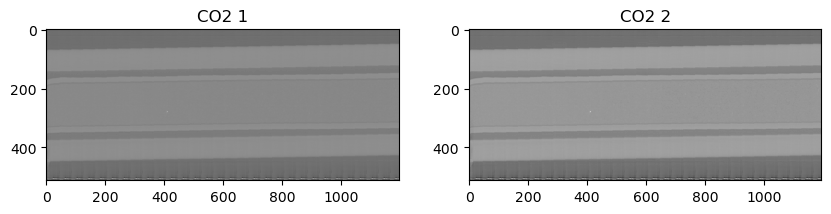

In [85]:
# Compare dry to dry sample
co1 = 'C:/Users/ubillusj/Desktop/Almostafa/CO2/CO_1/'
co2 = 'C:/Users/ubillusj/Desktop/Almostafa/CO2/CO_2/'

# Read dicom files
co2_1_slices = ft.read_dicom(co1)
co2_2_slices = ft.read_dicom(co2)

fig,ax = plt.subplots(1,2,figsize=(10,10))

ax[0].imshow(co2_1_slices[256],cmap='gray')
ax[0].set_title('CO2 1')
ax[1].imshow(co2_2_slices[256],cmap='gray')
ax[1].set_title('CO2 2')

plt.show()

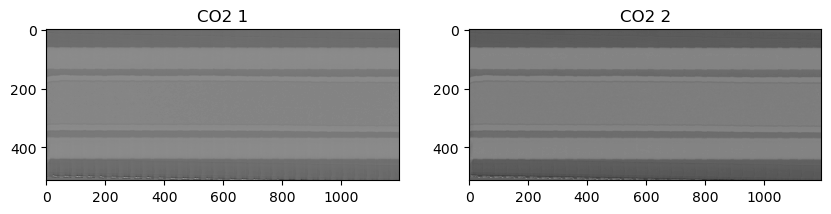

In [94]:
# center images 
center_1, CO_1_aligned = ft.center_itk(co2_1_slices,265,259,243,255)
center_2, CO_2_aligned = ft.center_itk(co2_2_slices,265,259,243,255)

fig,ax = plt.subplots(1,2,figsize=(10,10))

ax[0].imshow(CO_1_aligned[256],cmap='gray')
ax[0].set_title('CO2 1')
ax[1].imshow(wet_2_aligned[256],cmap='gray')
ax[1].set_title('CO2 2')

plt.show()

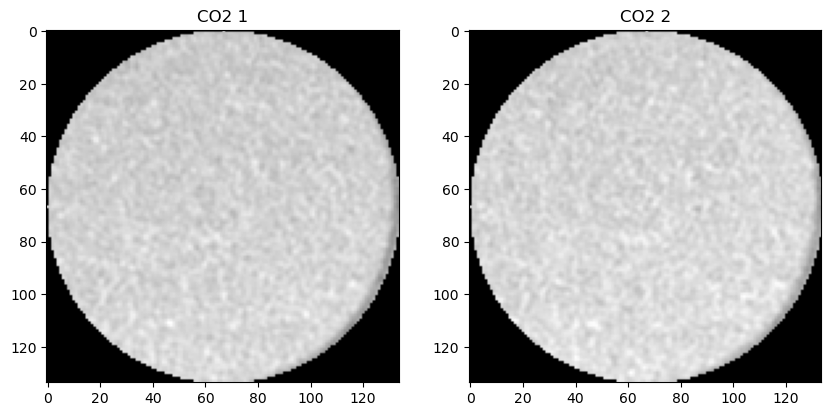

In [95]:
# crop dry images
co2_1_masked = ft.mask_images(CO_1_aligned,256,256,67,1196)
co2_2_masked = ft.mask_images(CO_2_aligned,256,256,67,1196)

fig,ax = plt.subplots(1,2,figsize=(10,10))

ax[0].imshow(co2_1_masked[:,:,256],cmap='gray')
ax[0].set_title('CO2 1')
ax[1].imshow(co2_2_masked[:,:,256],cmap='gray')
ax[1].set_title('CO2 2')

plt.show()

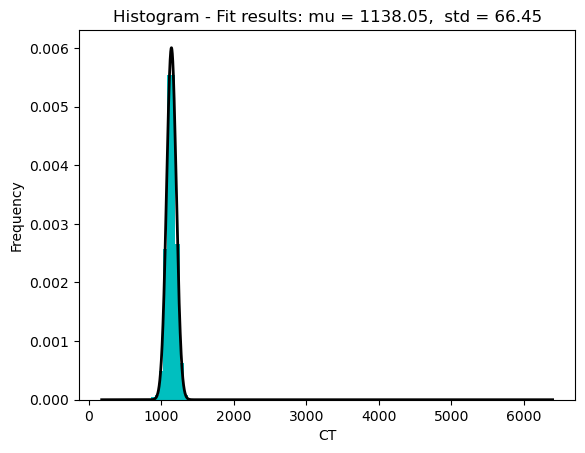

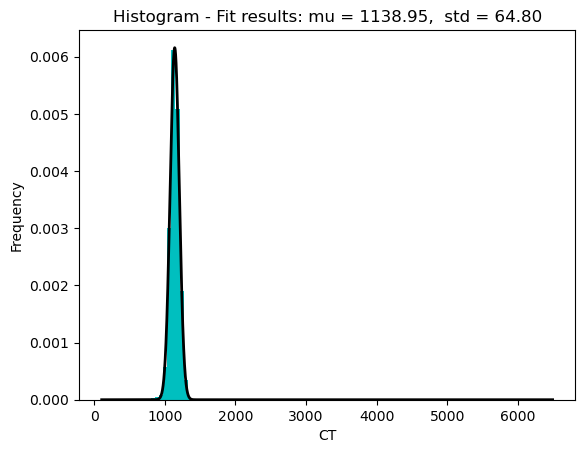

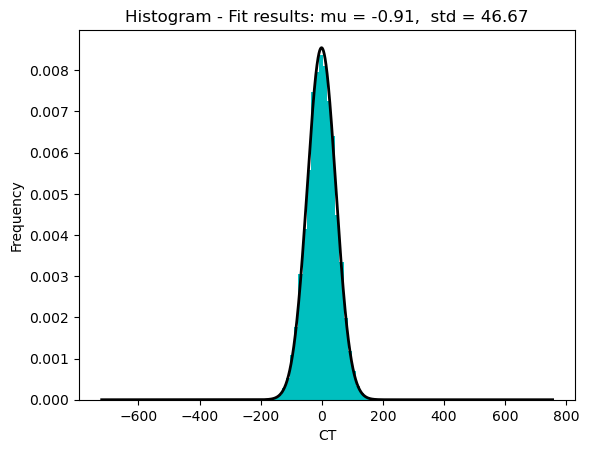

In [96]:
# Histograms for CO2 scans
ft.histograms(co2_1_masked)
ft.histograms(co2_2_masked)
ft.histograms(co2_1_masked-co2_2_masked)


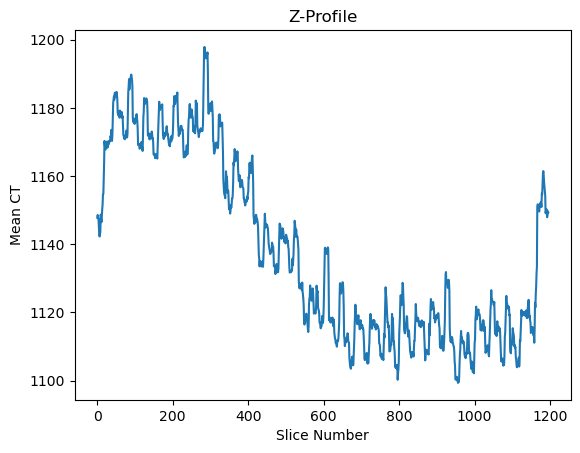

[1147.7687,
 1148.5895,
 1147.6858,
 1147.6658,
 1145.3729,
 1143.0728,
 1142.2822,
 1143.065,
 1143.5662,
 1148.6803,
 1147.4006,
 1146.477,
 1148.575,
 1150.3401,
 1151.695,
 1154.6859,
 1154.7625,
 1159.1669,
 1163.8224,
 1170.3142,
 1168.9924,
 1168.4027,
 1167.825,
 1169.3706,
 1168.7267,
 1169.2324,
 1170.1554,
 1168.328,
 1169.7963,
 1169.3196,
 1169.2397,
 1170.3208,
 1169.9539,
 1170.1793,
 1170.6427,
 1171.7609,
 1171.3756,
 1173.5466,
 1170.8634,
 1170.3147,
 1172.1799,
 1176.8673,
 1181.4496,
 1182.4587,
 1183.359,
 1182.4247,
 1184.3522,
 1184.4844,
 1183.2764,
 1183.8506,
 1183.997,
 1184.6862,
 1183.9159,
 1182.4819,
 1178.5182,
 1178.3124,
 1177.8024,
 1178.9705,
 1178.1378,
 1177.1309,
 1179.2437,
 1178.9669,
 1177.4171,
 1177.8711,
 1178.1051,
 1178.7496,
 1177.0753,
 1177.5914,
 1174.7953,
 1172.0638,
 1171.8066,
 1170.9907,
 1170.9786,
 1170.8047,
 1171.0608,
 1172.1111,
 1172.318,
 1173.3384,
 1171.405,
 1171.3372,
 1172.6028,
 1177.9197,
 1184.7811,
 1186.1725,
 1

In [98]:
def z_profiling(slices):
    z_profile = []
    number = []
    slices = slices.copy()
    slices[slices == 0] = np.nan
    for s in range(slices.shape[2]):
        z_profile.append(np.nanmean(slices[:,:,s]))
        number.append(s)
    
    plt.plot(number,z_profile)
    plt.xlabel('Slice Number')
    plt.ylabel('Mean CT')
    plt.title('Z-Profile')
    plt.show()

    return z_profile

z_profiling(co2_1_masked)

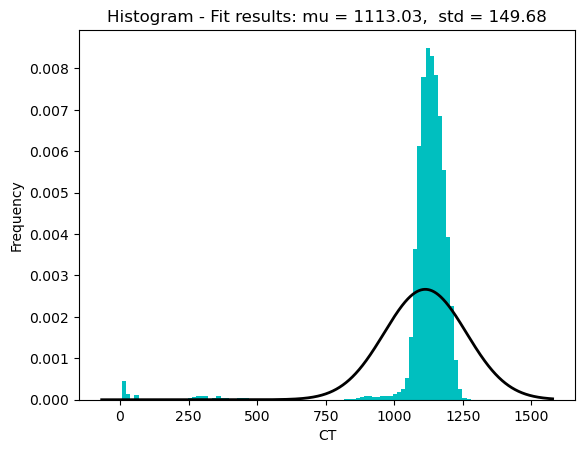

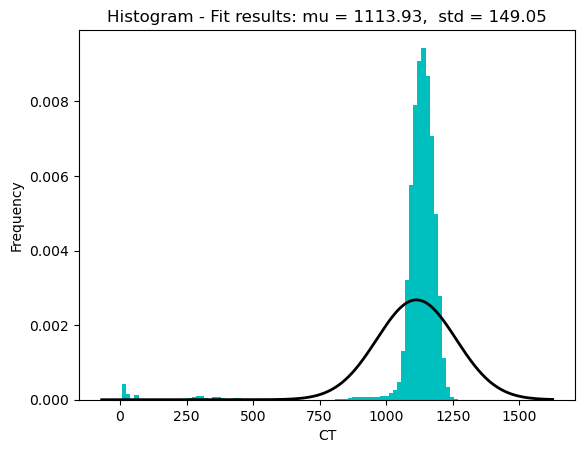

In [99]:
# Resample both CO2 scans
co1r1 = ft.resample(co2_1_masked,size=5,new_spacing=[1,1,1])
co2r1 = ft.resample(co2_2_masked,size=5,new_spacing=[1,1,1])

# plot histograms  
ft.histograms(co1r1)
ft.histograms(co2r1)

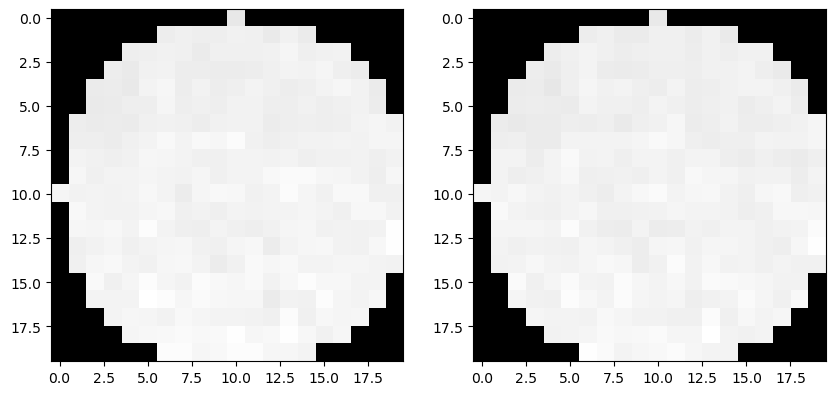

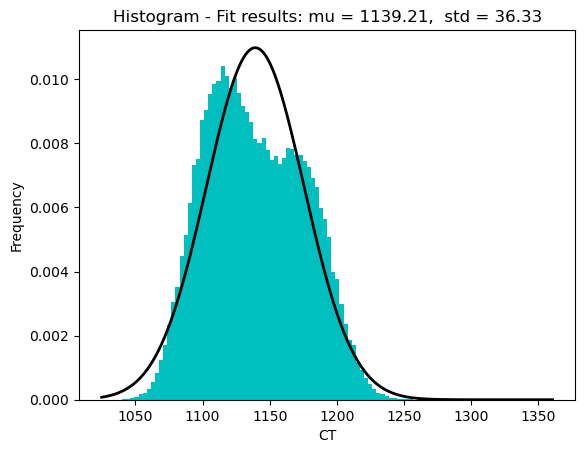

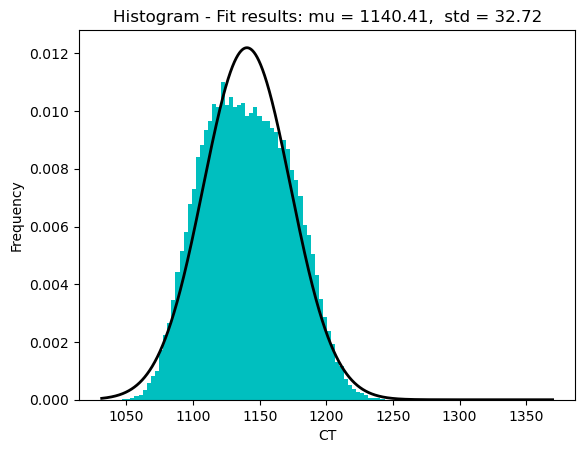

In [100]:
# Mask again to get rid off the edges
c1 = ft.mask_images(co1r1,17,17,10,299)
c2 = ft.mask_images(co2r1,17,17,10,299)

fig,ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(c1[:,:,256],cmap='gray')
ax[1].imshow(c2[:,:,256],cmap='gray')

plt.show()

ft.histograms(c1)
ft.histograms(c2)


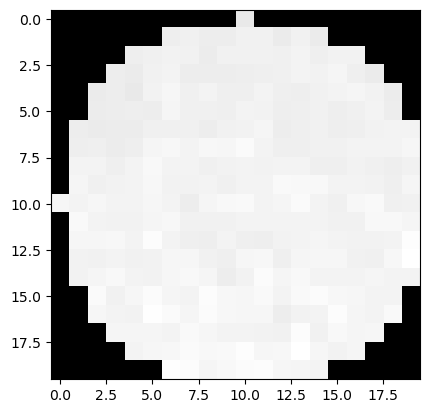

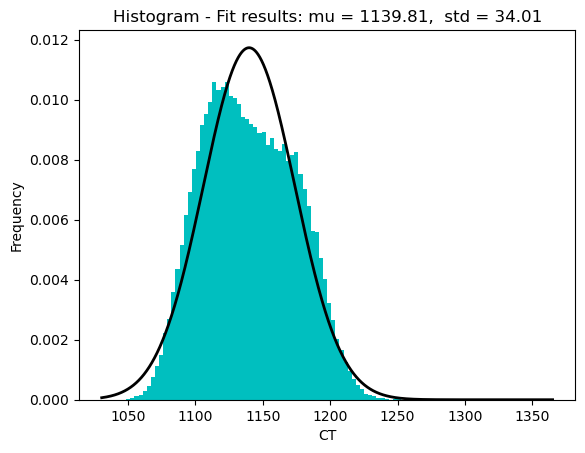

In [101]:
# Avg both co2 scans
co_avg = (c1 + c2)/2
plt.imshow(co_avg[:,:,256],cmap='gray')

plt.show()

ft.histograms(co_avg)

## Multiphase flow (CO2 and brine)

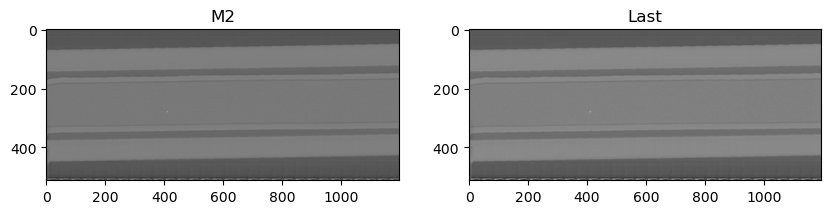

In [102]:
# Read M2 and last scans
m2 = 'C:/Users/ubillusj/Desktop/Almostafa/CO2/M_2/'
last = 'C:/Users/ubillusj/Desktop/Almostafa/CO2/last/'

# Read dicom files
m2_slices = ft.read_dicom(m2)
last_slices = ft.read_dicom(last)

fig,ax = plt.subplots(1,2,figsize=(10,10))

ax[0].imshow(m2_slices[256],cmap='gray')
ax[0].set_title('M2')
ax[1].imshow(last_slices[256],cmap='gray')
ax[1].set_title('Last')

plt.show()

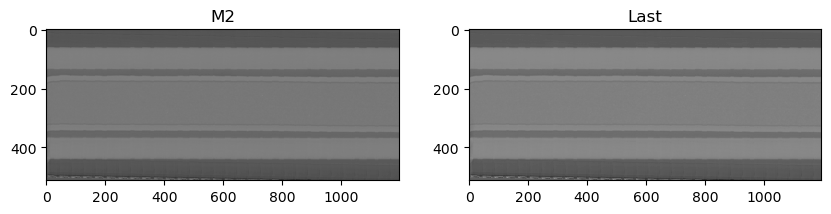

In [103]:
# center m2 and last as wet
center_m2, m2_aligned = ft.center_itk(m2_slices,265,259,243,255)
center_last, last_aligned = ft.center_itk(last_slices,265,259,243,255)

fig,ax = plt.subplots(1,2,figsize=(10,10))

ax[0].imshow(m2_aligned[256],cmap='gray')
ax[0].set_title('M2')
ax[1].imshow(last_aligned[256],cmap='gray')
ax[1].set_title('Last')

plt.show()

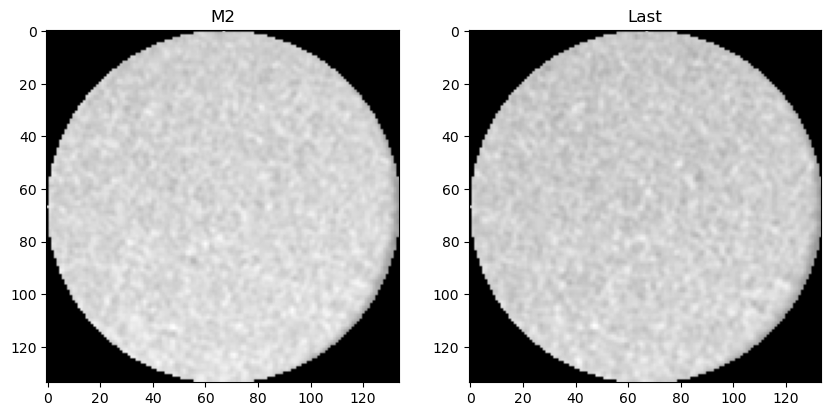

In [104]:
# crop m2 and last images
m2_masked = ft.mask_images(m2_aligned,256,256,67,1196)
last_masked = ft.mask_images(last_aligned,256,256,67,1196)

fig,ax = plt.subplots(1,2,figsize=(10,10))

ax[0].imshow(m2_masked[:,:,256],cmap='gray')
ax[0].set_title('M2')
ax[1].imshow(last_masked[:,:,256],cmap='gray')
ax[1].set_title('Last')

plt.show()

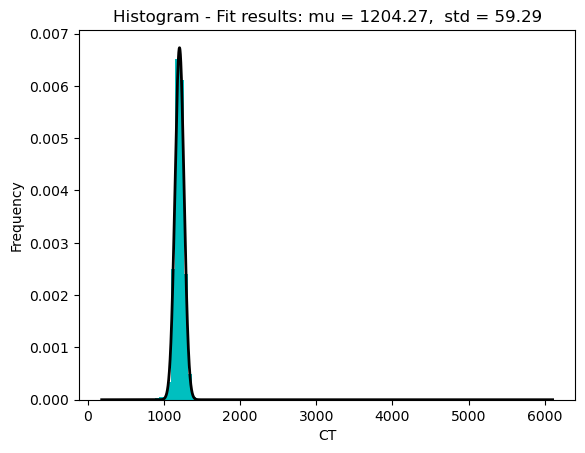

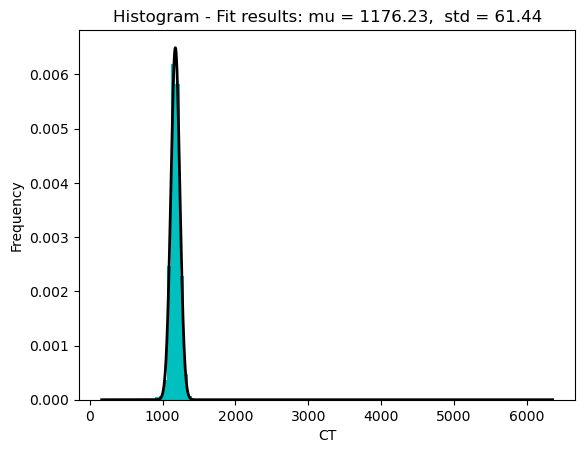

In [105]:
# histograms for m2 and last 
ft.histograms(m2_masked)
ft.histograms(last_masked)


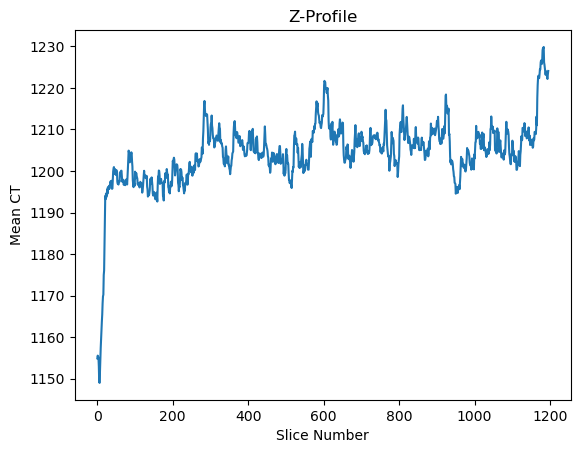

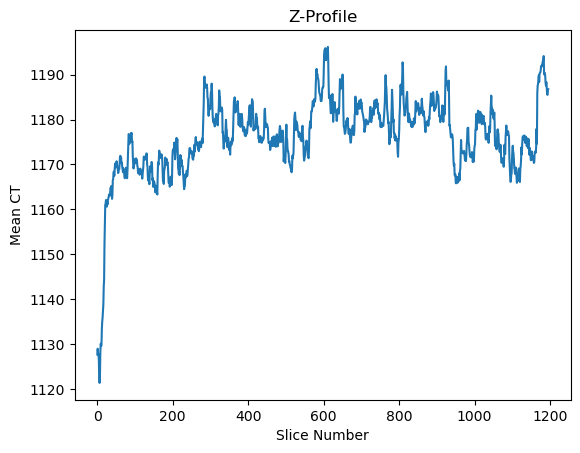

[1127.6671,
 1128.9454,
 1127.7792,
 1127.7649,
 1126.5568,
 1122.649,
 1121.3275,
 1122.8757,
 1128.1749,
 1130.0585,
 1129.5641,
 1129.6957,
 1133.2964,
 1134.9948,
 1135.9409,
 1137.4276,
 1138.8605,
 1142.8402,
 1144.285,
 1152.2764,
 1157.0349,
 1161.0073,
 1161.282,
 1162.0786,
 1161.3661,
 1160.6023,
 1161.6819,
 1161.0659,
 1162.1079,
 1162.3079,
 1162.746,
 1163.218,
 1163.3776,
 1162.9946,
 1163.6072,
 1164.7753,
 1164.6127,
 1165.1624,
 1164.4954,
 1162.3252,
 1163.1016,
 1166.4451,
 1166.6873,
 1168.2396,
 1168.4021,
 1167.4569,
 1168.9614,
 1170.1719,
 1169.2542,
 1169.3655,
 1169.9138,
 1170.7053,
 1170.3601,
 1169.3616,
 1169.2461,
 1168.0901,
 1168.1754,
 1169.1991,
 1168.9336,
 1169.9327,
 1171.5873,
 1171.9142,
 1170.6261,
 1171.5094,
 1170.3516,
 1170.4028,
 1169.4728,
 1168.8676,
 1168.2844,
 1169.1337,
 1168.3135,
 1168.291,
 1167.0767,
 1166.9187,
 1167.1763,
 1168.0295,
 1169.2535,
 1168.5922,
 1167.1831,
 1166.9191,
 1168.7678,
 1171.1921,
 1174.1786,
 1176.7611

In [106]:
# z profiling for m2 and last
z_profiling(m2_masked)
z_profiling(last_masked)


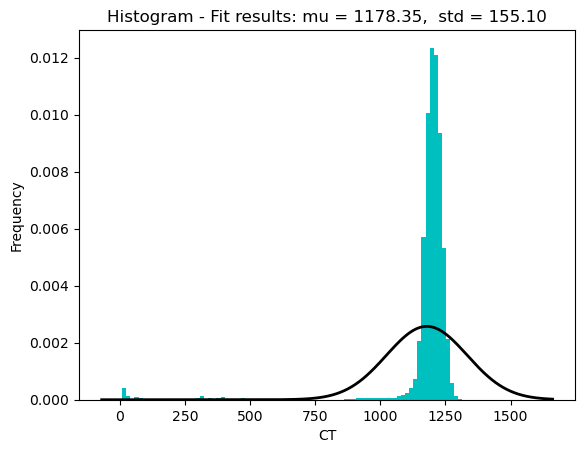

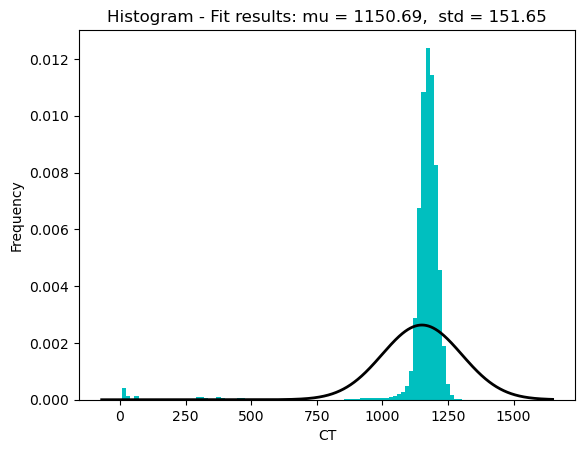

In [107]:
# resample m2 and last
m2r1 = ft.resample(m2_masked,size=5,new_spacing=[1,1,1])
lastr1 = ft.resample(last_masked,size=5,new_spacing=[1,1,1])

# plot histograms
ft.histograms(m2r1)
ft.histograms(lastr1)

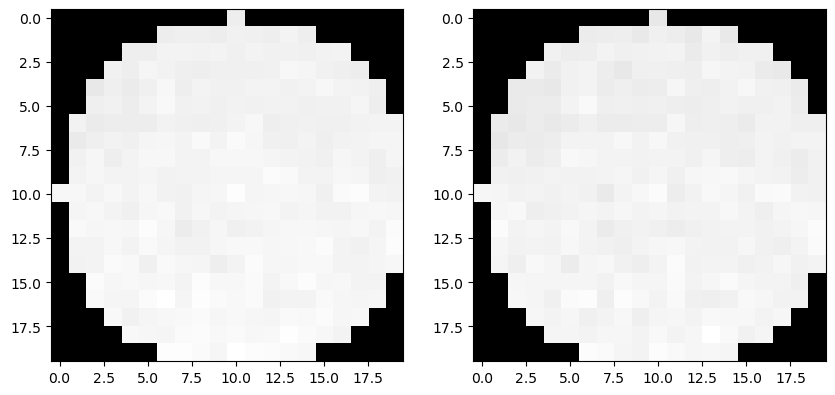

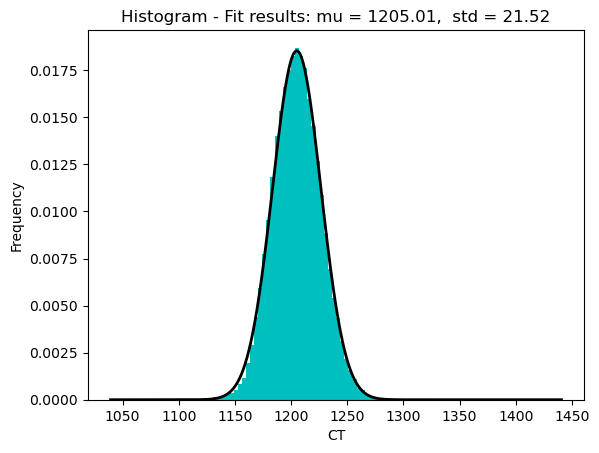

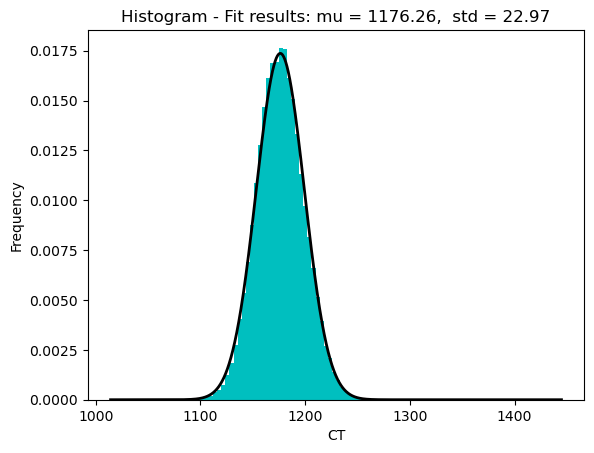

In [109]:
# mask again to get rid off the edges
m2r2 = ft.mask_images(m2r1,17,17,10,299)
lastr2 = ft.mask_images(lastr1,17,17,10,299)

fig,ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(m2r2[:,:,256],cmap='gray')
ax[1].imshow(lastr2[:,:,256],cmap='gray')

plt.show()

ft.histograms(m2r2)
ft.histograms(lastr2)

## CO2 SATURATION 
Remember this analysis might be wrong due to the difference of CO2 density inside the core

### Core average saturation

In [111]:
temp = lastr2.copy()
temp[temp == 0] = np.nan
tempco = co_avg.copy()
tempco[tempco == 0] = np.nan
tempw = wet_avg.copy()
tempw[tempw == 0] = np.nan


ctexpr = np.nanmean(temp)
ctco = np.nanmean(tempco)
ctw = np.nanmean(tempw)

sat = (ctw - ctexpr)/(ctw - ctco)
print('The core average saturation is: ',sat)


The core average saturation is:  0.4932081


### Slice average saturation

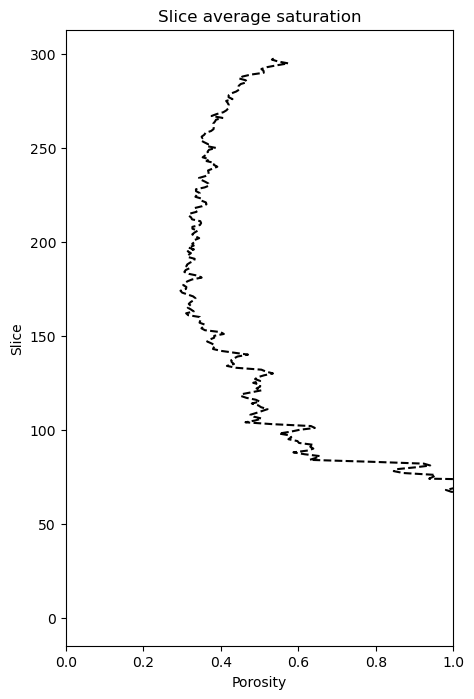

In [114]:
slice_expr_avg_ct = np.nanmean(temp,axis=(0,1))
slice_wet_avg_ct = np.nanmean(tempw,axis=(0,1))
slice_co_avg_ct = np.nanmean(tempco,axis=(0,1))

sat_slice = (slice_wet_avg_ct - slice_expr_avg_ct )/(slice_wet_avg_ct - slice_co_avg_ct)

plt.figure(figsize=(5,8))
plt.plot(sat_slice,range(len(poro_slice)),color='black',linestyle='--')
plt.title('Slice average saturation')
plt.xlim(0,1)
plt.ylabel('Slice')
plt.xlabel('Porosity')

plt.show()

### Voxel level saturation

C:\Users\ubillusj\AppData\Local\Temp\ipykernel_8820\1669101372.py:1: RuntimeWarning: invalid value encountered in divide
  vox_sat = (wet_avg - lastr2)/(wet_avg - co_avg)


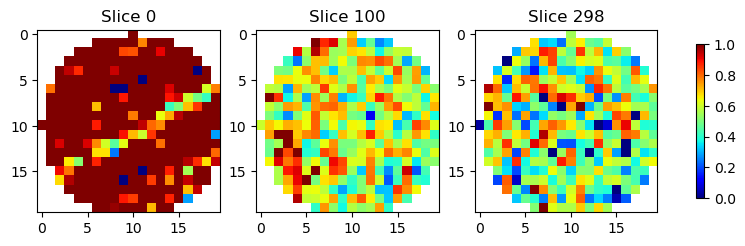

In [121]:
vox_sat = (wet_avg - lastr2)/(wet_avg - co_avg)

# Plot three different slices
fig,ax = plt.subplots(1,3,figsize=(10,10))

im = ax[0].imshow(vox_sat[:,:,0],cmap='jet',vmin=0,vmax=1)
ax[0].set_title('Slice 0')
ax[1].imshow(vox_sat[:,:,100],cmap='jet',vmin=0,vmax=1)
ax[1].set_title('Slice 100')
ax[2].imshow(vox_sat[:,:,298],cmap='jet',vmin=0,vmax=1)
ax[2].set_title('Slice 298')

fig.colorbar(im, ax=ax.ravel().tolist(),orientation='vertical',shrink = 0.2)
plt.show()

